In [6]:
import matplotlib.pyplot as plt
import numpy as np

Sample size

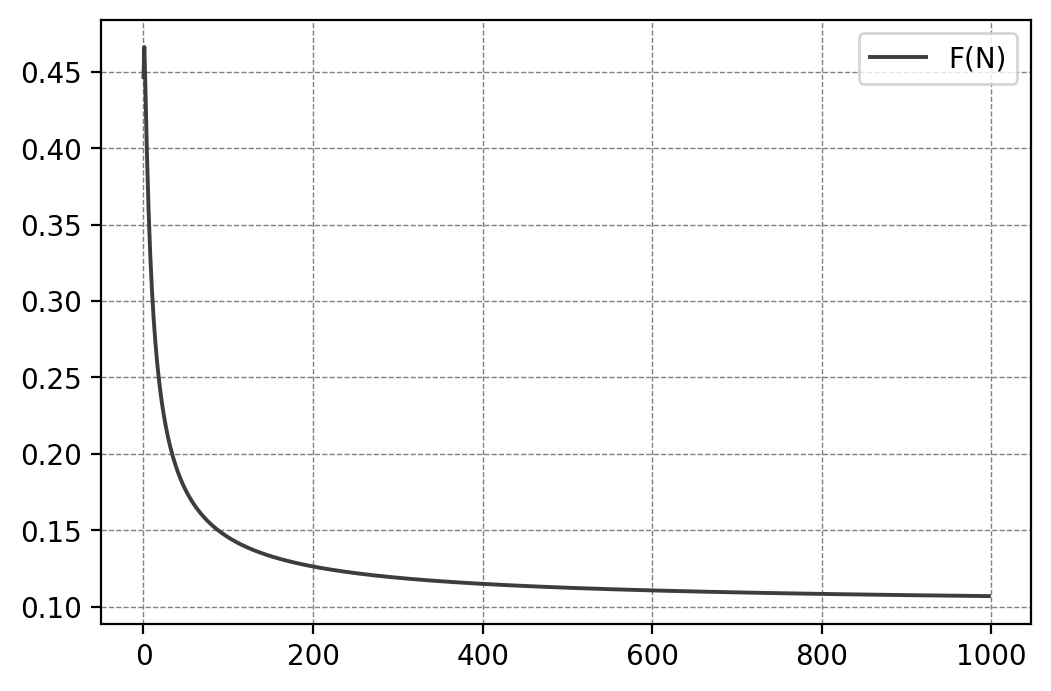

In [45]:
fN = []
for N in range(2,1000):
    epsilon = 0.005
    fN.append(0.1 + np.log(N)/N)
plt.figure(dpi = 200)
plt.plot(fN,color='#3D3D3D',linewidth=1.4,label='F(N)')
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
plt.legend()
plt.savefig('images/fN.png')

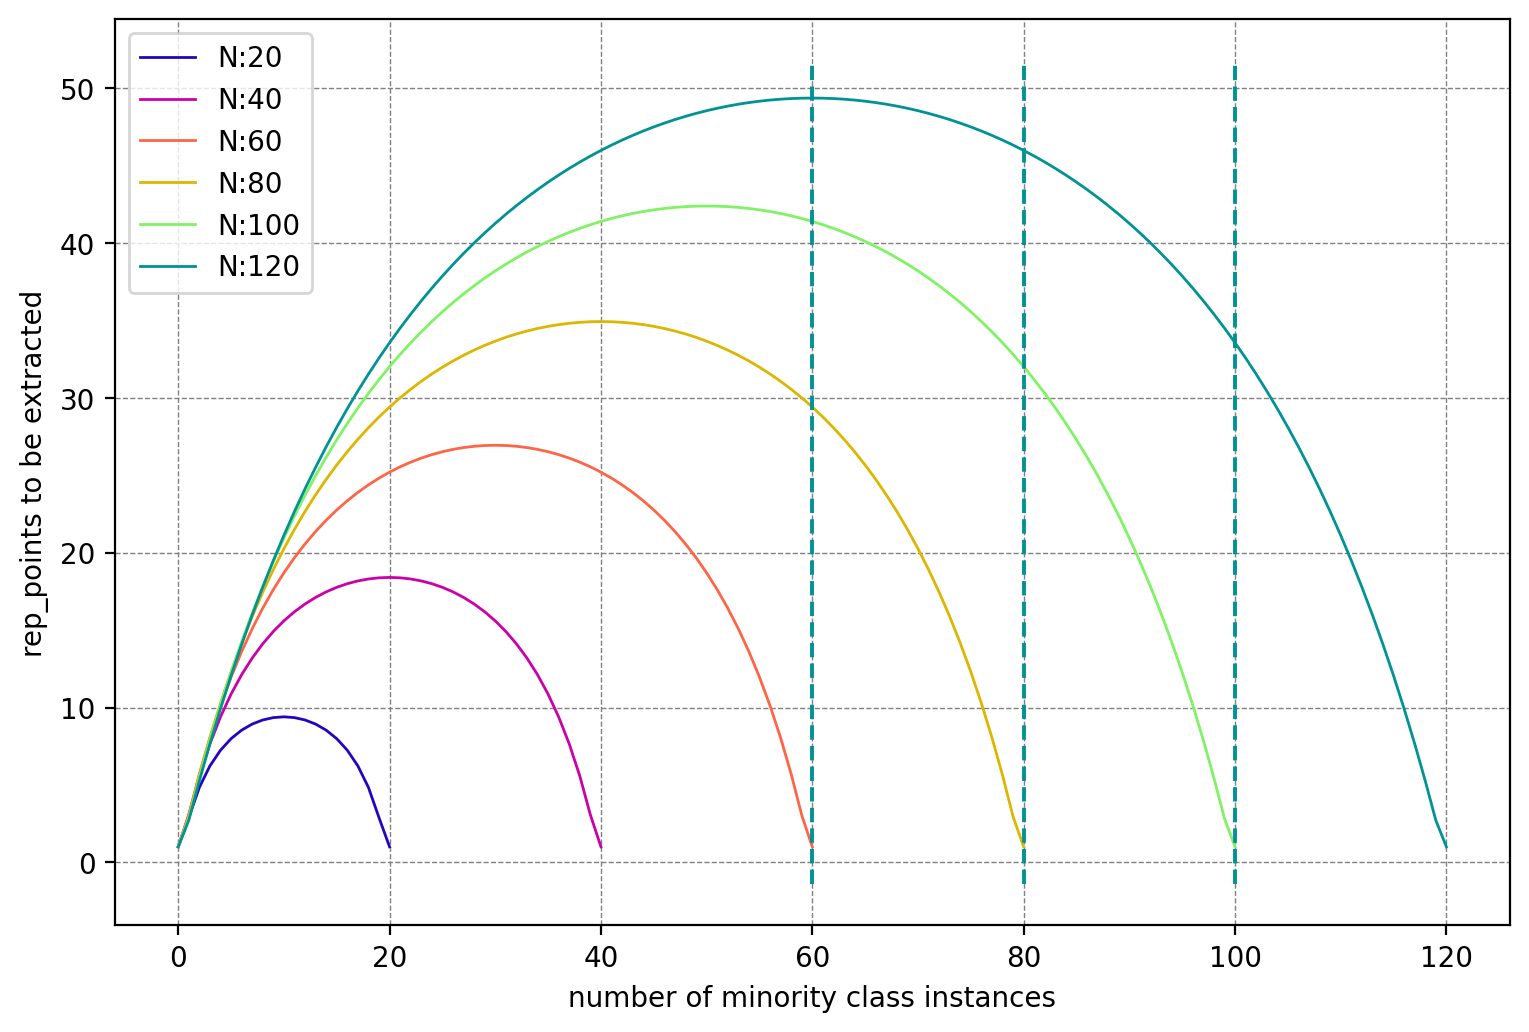

In [44]:
import colorir
grad = colorir.PolarGrad(["#2304C0","FE6546","80F365","1B205F"])
c = iter(grad.n_colors(7))
plt.figure(figsize=(9,6),dpi=200)
for N in [20,40,60,80,100,120]:
    size1s = []
    for num_min in range(N+1):
        p = num_min/N

        # size1 might be 0 when num_min == 0 or num_min == N, then set c = 1, choose centroid as rep_point directly
        if p==0 or p==1:
            size1 = 1

        else:
            Z = 1.64
            epsilon = 0.05
            e = epsilon + np.log(N)/N
            x = (Z**2 * p * (1-p)) / (e**2)
            size1 = (N * x) / (x + N - 1)

        size1s.append(size1)
    color = next(c)
    plt.plot(size1s,label='N:'+str(N),alpha=1, linewidth=1,color=color)
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
y1 = plt.ylim()[0]
y2 = plt.ylim()[1]
plt.vlines(60,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(80,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(100,y1, y2,linestyles='dashed',linewidth=1.4,color=color)

plt.xlabel('number of minority class instances')
plt.ylabel('rep_points to be extracted')
plt.legend(loc = 'upper left')
#     print(num_min,'|',size1)
plt.savefig('images/rep_extract.png')

Gaussian Generator

In [1]:
from COS_Funcs.utils import *
from COS_Funcs.cos.cos import *
from COS_Funcs.utils.visualize import *
X,y = read_data('Datasets/sampledata_new_3.csv',)
X_train,X_test,y_train,y_test = split_data(X,y)
N = 50
c = 0
alpha = 0.2
clusters,all_reps,_,labels = clustering(X_train,y_train,N,c,alpha)
areas,min_all_safe_area,min_half_safe_area = safe_areas(X_train,all_reps,y_train) 
area = min_all_safe_area[9]

In [14]:
def gd(x, mu=0, sigma=0.1):
    '''
    sigma: std
    '''
    left = 1 / (np.sqrt(2 * math.pi) * np.sqrt(sigma))
    right = np.exp(-(x - mu)**2 / (2 * sigma))
    return left * right

x = np.arange(-1, 1, 0.001) 

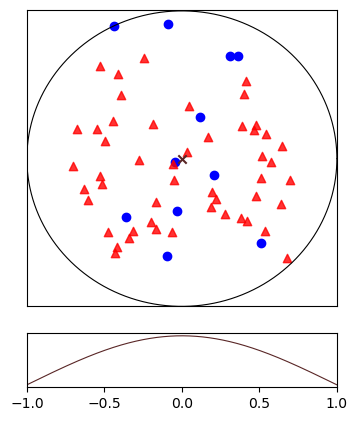

In [43]:
import numpy as np
std = 1

# Generate some samples
new_points = G.Gaussian_Generator(area,50,std)

# Gaussian 
y = gd(x, sigma=std)

minlabel,majlabel = G.get_label_in_areas(area)
min_neighbor = area.nearest_neighbor[area.nearest_neighbor_label == minlabel]
maj_neighbor = area.nearest_neighbor[area.nearest_neighbor_label == majlabel]

r = area.radius
center = area.rep_point
x_ = np.linspace(center[0] - r, center[0] + r, 5000)
y1 = np.sqrt(abs(r**2 - (x_ - center[0])**2)) + center[1]
y2 = -np.sqrt(abs(r**2 - (x_ - center[0])**2)) + center[1]

fig = plt.figure(figsize = (4,5),dpi = 100)   
grid = plt.GridSpec(5,                   # 行数 
                    4,                   # 列数
                    hspace = 0.5,        # 行与行之间的间隔
                    wspace = 0.2)        # 列与列之间的间隔

ax_main = fig.add_subplot(grid[:-1, 0:],xticks=[],yticks=[],xlim=[min(x_),max(x_)],ylim=[min(y2),max(y1)+0.001])
ax_head = fig.add_subplot(grid[-1, 0:],xlim=[-1,1],yticks=[])


ax_main.scatter(min_neighbor[:,0],min_neighbor[:,1],marker=min_mark,c=min_color,label=min_label)
ax_main.scatter(maj_neighbor[:,0],maj_neighbor[:,1],marker=maj_mark,c=maj_color,label=maj_label)

ax_main.scatter(new_points[:,0],new_points[:,1],marker=syn_mark,c=syn_c,label=syn_label,alpha=syn_alpha)
ax_main.scatter(area.rep_point[0],area.rep_point[1],c=rep_color,marker=rep_mark,label=rep_label[:-1]    )

# ax_main.set(title='std = '+str(std))


ax_main.plot(x_, y1, 'k',linewidth=0.8)
ax_main.plot(x_, y2, 'k',linewidth=0.8)

ax_main.grid(visible=True,color=grid_color, linestyle=grid_line, linewidth=grid_line_width)
                          
ax_head.plot(x,y,c=rep_color,linewidth=0.8)
# ax_head.invert_yaxis()

plt.savefig('images/std_'+str(std)+'.png')